In [1]:
from influxdb import InfluxDBClient
import pandas as pd
from bokeh.models import HoverTool, ColumnDataSource, BoxZoomTool
from bokeh.models.ranges import Range1d
from bokeh.models.axes import LinearAxis
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
import talib
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
output_notebook()
%matplotlib inline
sns.set()

Loading BokehJS ...

In [2]:
db = InfluxDBClient('104.248.41.39', 8086, 'admin', 'jndm4jr5jndm4jr6', 'darwinex')
#################
ticker = 'EURUSD'
start = dt(2018,12,4,9,0)
end = dt(2018,12,5,9,0)
start_epoch = int(float(start.timestamp())) * 1000 * 1000 * 1000
end_epoch = int(end.timestamp()) * 1000 * 1000 * 1000
freq='1m'
query = "Select spread(price) from {} where time > {} and time < {} group by time({})".format(ticker, str(start_epoch), str(end_epoch), freq)
#################

def influx_to_pandas(result):
    df = pd.DataFrame(result, )
    df.index = pd.to_datetime(df['time'])
  
    return df.drop(['time'], axis=1)

result = list(db.query(query))[0]
df = influx_to_pandas(result).dropna()

df.head()

,spread
time,
2018-12-04 09:00:00,0.00063
2018-12-04 09:01:00,0.00034
2018-12-04 09:02:00,0.00025
2018-12-04 09:03:00,0.00028
2018-12-04 09:04:00,0.00032


<Figure size 1080x360 with 0 Axes>

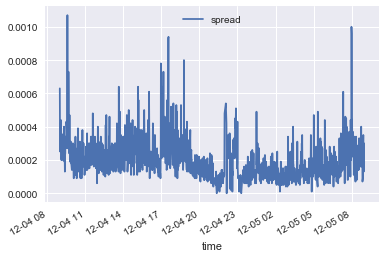

In [3]:
plt.figure(figsize=(15,5))
df.plot()



In [19]:
db = InfluxDBClient('104.248.41.39', 8086, 'admin', 'jndm4jr5jndm4jr6', 'darwinex')
#################
ticker = 'EURCHF'
start = dt(2018,12,4,9,0)
end = dt(2018,12,5,9,0)
start_epoch = int(float(start.timestamp())) * 1000 * 1000 * 1000
end_epoch = int(end.timestamp()) * 1000 * 1000 * 1000
freq='1m'
queryask = "Select last(price) from {} where time > {} and time < {} and quote = 'ask' group by time({})".format(ticker, str(start_epoch), str(end_epoch), freq)
querybid = "Select last(price) from {} where time > {} and time < {} and quote = 'bid' group by time({})".format(ticker, str(start_epoch), str(end_epoch), freq)

#################

def influx_to_pandas(result):
    df = pd.DataFrame(result, )
    df.index = pd.to_datetime(df['time'])
  
    return df.drop(['time'], axis=1)

result = list(db.query(queryask))[0]
dfask = influx_to_pandas(result)

result = list(db.query(querybid))[0]
dfbid = influx_to_pandas(result)
spread = pd.DataFrame()
spread['spread'] = dfask['last'] - dfbid['last']
print(spread.head())

                      spread
time                        
2018-12-04 09:00:00  0.00010
2018-12-04 09:01:00  0.00009
2018-12-04 09:02:00  0.00008
2018-12-04 09:03:00  0.00010
2018-12-04 09:04:00  0.00010


<Figure size 1080x3600 with 0 Axes>

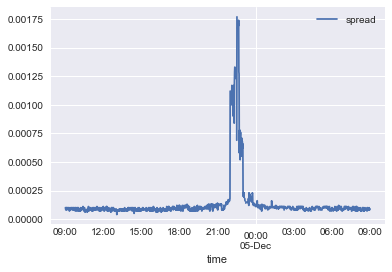

In [20]:
plt.figure(figsize=(15,50))
spread.plot()


In [6]:
tools = ['reset', 'box_select', 'pan', 'zoom_out', 'wheel_zoom']

p1 = figure(tools=tools, x_axis_type="datetime", title=ticker, plot_width=700)

p1.line(df.index.values, df[df.columns[0]].values, color='green', legend=df.columns[0])
show(p1)

NameError: name 'S' is not defined

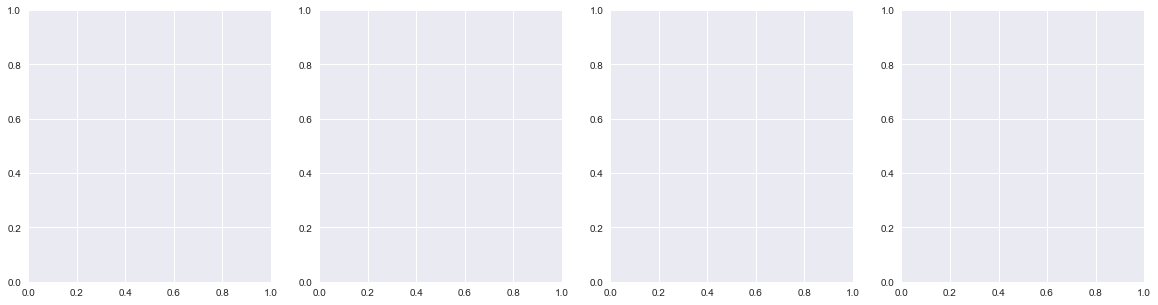

In [7]:
time = [1.5, 1, 0.5, 0.01]
fig, ax = plt.subplots(1, len(time), figsize=(20,5))
intrinsicValue = [max(s - K, 0) for s in S]
for i, T in enumerate(time):
    optionValue = list(map(op, S))
    ax[i].plot(S, optionValue, label="Option Value")
    ax[i].plot(S, intrinsicValue, label="Instrinsic Value")
    ax[i].fill_between(S, intrinsicValue, optionValue, alpha=0.2, label="Time Value")
    ax[i].set_title('Time to maturity {}'.format(T))
    ax[i].legend()

In [ ]:
plt.figure(figsize=(10,6))
S = np.linspace(70, 120)
op = lambda S: bs(S, K, vol, r, T, True)

time = np.linspace(1, 0.000001, 6)
for T in time:
    optionValue = list(map(op, S))
    plt.plot(S, optionValue, label="t={:.2f}".format(T))
plt.legend();